In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.options.mode.chained_assignment = None

SOEP Data
-------------

In [3]:
data_full = pd.read_stata('soepcore_prep.dta')

In [4]:
def pre_process_soep_data(file_name):
    
    data_full = pd.read_stata(file_name)
    
    # Restrict sample to age 50
    data_30periods = data_full[data_full["age"] < 47]

    # Restirct sample to west Germany
    data = data_30periods[data_30periods["east"] == 0]

    # Drop observations with missing values in hdegree
    data = data[data["hdegree"].isna() == False]

    # Generate period variable
    def get_period(row):
        return row["age"] -17

    data["Period"] = data.apply(
        lambda row: get_period(row), axis=1
    )

    # Determine the observed wage given period choice
    def recode_educ_level(row):
        if row["hdegree"] == 'Primary/basic vocational':
            return 0
        elif row["hdegree"] == 'Abi/intermediate voc.':
            return 1
        elif row["hdegree"] == 'University':
            return 2
        else:
            return np.nan

    data["Educ Level"] = data.apply(
        lambda row: recode_educ_level(row), axis=1
    )
    
    # Recode choice
    # Determine the observed wage given period choice
    def recode_choice(row):
        if row["empchoice"] == 'Full-Time':
            return 2
        elif row["empchoice"] == 'Part-Time':
            return 1
        elif row["empchoice"] == 'Non-Working':
            return 0
        else:
            return np.nan

    data["Choice"] = data.apply(
        lambda row: recode_choice(row), axis=1
    )
    
    # Generate wage for Non-Employment choice
    data["wage_nw_imp"] = 6.00

    # Determine the observed wage given period choice
    def get_observed_wage(row):
        if row["empchoice"] == 'Full-Time':
            return row["wage_ft"]
        elif row["empchoice"] == 'Part-Time':
            return row["wage_pt"]
        elif row["empchoice"] == 'Non-Working':
            return row["wage_nw_imp"]
        else:
            return np.nan

    data["Wage Observed"] = data.apply(
        lambda row: get_observed_wage(row), axis=1
    )
    
    return data

In [5]:
data = pre_process_soep_data('soepcore_prep.dta')

In [6]:
data.head(20)

,pid,syear,educyrs,hdegree,age,empchoice,wage_ft,wage_pt,wage_nw,pgimpgro,east,exper_ft,exper_pt,exper_nw,Period,Educ Level,Choice,wage_nw_imp,Wage Observed
0,302,1992,10.0,Primary/basic vocational,31,Non-Working,NaN,NaN,NaN,NaN,0,7.0,3.0,5.0,14,0,0,6.0,6.000000
1,302,1993,10.0,Primary/basic vocational,32,Non-Working,NaN,NaN,NaN,NaN,0,7.0,3.0,6.0,15,0,0,6.0,6.000000
2,602,1992,16.0,University,34,Part-Time,NaN,24.283804,NaN,[0] Nicht imputiert,0,6.0,3.0,3.0,17,2,1,6.0,24.283804
3,602,1993,16.0,University,35,Part-Time,NaN,25.427456,NaN,[0] Nicht imputiert,0,6.0,4.0,3.0,18,2,1,6.0,25.427456
4,602,1994,16.0,University,36,Part-Time,NaN,25.201141,NaN,[0] Nicht imputiert,0,6.0,5.0,3.0,19,2,1,6.0,25.201141
5,602,1995,16.0,University,37,Part-Time,NaN,25.162991,NaN,[0] Nicht imputiert,0,6.0,6.0,3.0,20,2,1,6.0,25.162991
6,602,1996,16.0,University,38,Non-Working,NaN,NaN,NaN,NaN,0,6.0,7.0,3.0,21,2,0,6.0,6.000000
7,602,1997,16.0,University,39,Non-Working,NaN,NaN,NaN,NaN,0,6.0,7.0,4.0,22,2,0,6.0,6.000000
8,602,1998,16.0,University,40,Non-Working,NaN,NaN,NaN,NaN,0,6.0,7.0,5.0,23,2,0,6.0,6.000000
9,602,2000,16.0,University,42,Non-Working,NaN,NaN,NaN,NaN,0,6.0,8.0,6.0,25,2,0,6.0,6.000000


In [7]:
# Number of individuals
print(data["pid"].nunique(), data_full["pid"].nunique())

15874 25502


In [8]:
# Number of data points
print(data["pid"].size, data_full["pid"].size)

59096 115609


Simulated Dataset
----------------------

In [9]:
import soepy

In [10]:
# Simulate dataset based on estimated parameter vector
data_sim = soepy.simulate('results_4_init_file_1000.yml')

In [6]:
#Determine the observed wage given period choice
def get_observed_wage (row):
    if row['Choice'] == 2:
        return row['Period Wage F']
    elif row['Choice'] ==1:
        return row['Period Wage P']
    elif row['Choice'] ==0:
        return row['Period Wage N']
    else:
        return np.nan

# Add to data frame
data_sim['Wage Observed'] = data_sim.apply(
    lambda row: get_observed_wage (row),axis=1
)

# Determine the education level
def get_educ_level(row):
    if row["Years of Education"] >= 10 and row["Years of Education"] < 12:
        return 0
    elif row["Years of Education"] >= 12 and row["Years of Education"] < 16:
        return 1
    elif row["Years of Education"] >= 16:
        return 2
    else:
        return np.nan

data_sim["Educ Level"] = data_sim.apply(
    lambda row: get_educ_level(row), axis=1
)

NameError: name 'data_sim' is not defined

In [12]:
data_sim.head(20)

,Identifier,Period,Years of Education,Choice,Systematic Wage,Period Wage N,Period Wage P,Period Wage F,Consumption Utility N,Consumption Utility P,Consumption Utility F,Flow Utility N,Flow Utility P,Flow Utility F,Wage Observed,Educ Level
0,0,0,10,2.0,6.820958,6.0,8.125343,13.835821,-0.654707,-0.109483,-0.053477,-0.654707,-0.767219,-0.596011,13.835821,0
1,0,1,10,0.0,7.361481,6.0,8.630335,5.214262,-0.654707,-0.105848,-0.092365,-0.654707,-0.741746,-1.029412,6.000000,0
2,0,2,10,0.0,7.361481,6.0,5.664881,8.535119,-0.654707,-0.133990,-0.070090,-0.654707,-0.938953,-0.781160,6.000000,0
3,0,3,10,0.0,7.361481,6.0,8.264115,4.963578,-0.654707,-0.108450,-0.094948,-0.654707,-0.759978,-1.058210,6.000000,0
4,0,4,10,0.0,7.361481,6.0,7.052823,5.127854,-0.654707,-0.118516,-0.093233,-0.654707,-0.830515,-1.039090,6.000000,0
5,0,5,10,2.0,7.361481,6.0,8.100708,15.365966,-0.654707,-0.109670,-0.050427,-0.654707,-0.768525,-0.562009,15.365966,0
6,0,6,10,1.0,7.706334,6.0,11.273946,11.279029,-0.654707,-0.091137,-0.059960,-0.654707,-0.638658,-0.668259,11.273946,0
7,0,7,10,0.0,7.963460,6.0,7.380372,8.800131,-0.654707,-0.115541,-0.068900,-0.654707,-0.809668,-0.767897,6.000000,0
8,0,8,10,0.0,7.963460,6.0,7.202591,5.878132,-0.654707,-0.117129,-0.086369,-0.654707,-0.820799,-0.962594,6.000000,0
9,0,9,10,0.0,7.963460,6.0,7.561688,6.114526,-0.654707,-0.113981,-0.084483,-0.654707,-0.798738,-0.941573,6.000000,0


Comparison
---------------

0    0.405865
2    0.310410
1    0.283725
Name: Choice, dtype: float64

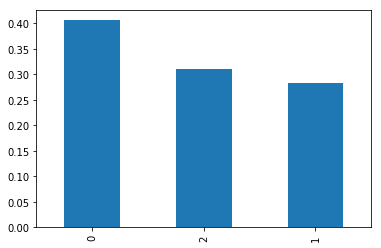

In [13]:
# Average non-employment, part-time, and full-time rates over all periods and individuals
# SOEP data
data['Choice'].value_counts(normalize=True).plot(kind = 'bar')
data['Choice'].value_counts(normalize=True)

0.0    0.430099
2.0    0.311309
1.0    0.258592
Name: Choice, dtype: float64

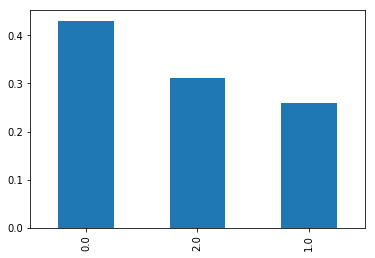

In [14]:
# Simulated sample
data_sim['Choice'].value_counts(normalize=True).plot(kind = 'bar')
data_sim['Choice'].value_counts(normalize=True)

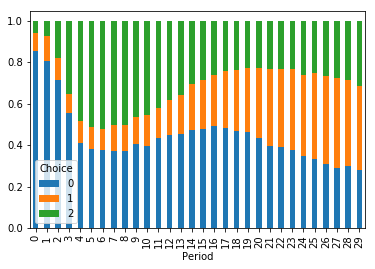

In [15]:
# Average non-employment, part-time, and full-time rates per period
# SOEP data
data.groupby(['Period'])['Choice'].value_counts(normalize=True).unstack().plot(kind = 'bar', stacked = True)

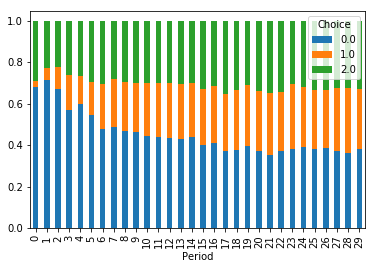

In [16]:
# Simulated sample
data_sim.groupby(['Period'])['Choice'].value_counts(normalize=True).unstack().plot(kind = 'bar', stacked = True)

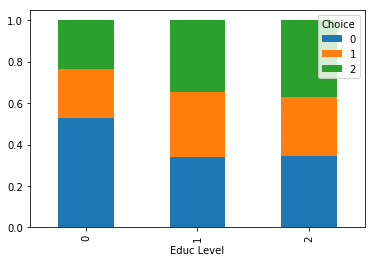

In [17]:
# Average non-employment, part-time, and full-time rates for individuals with different level of education
# SOEP data
data.groupby(['Educ Level'])['Choice'].value_counts(normalize=True).unstack().plot(kind = 'bar', stacked = True)

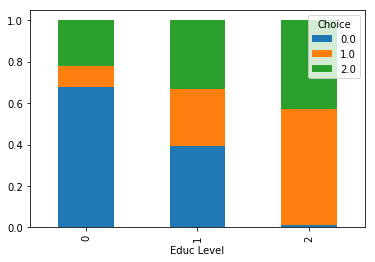

In [18]:
# Simulated sample
data_sim.groupby(['Educ Level'])['Choice'].value_counts(normalize=True).unstack().plot(kind = 'bar', stacked = True)

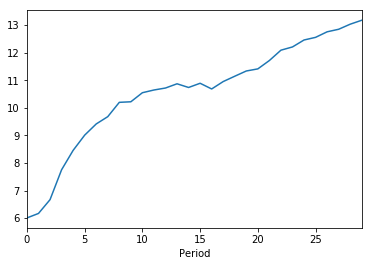

In [19]:
# Average observed wage per period
# SOEP Data
data.groupby(['Period'])['Wage Observed'].mean().plot()

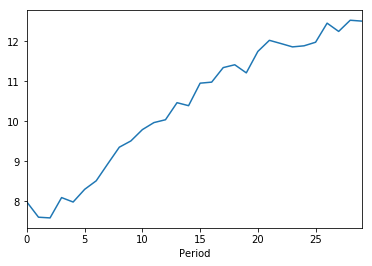

In [20]:
# Simulated sample
data_sim.groupby(['Period'])['Wage Observed'].mean().plot()

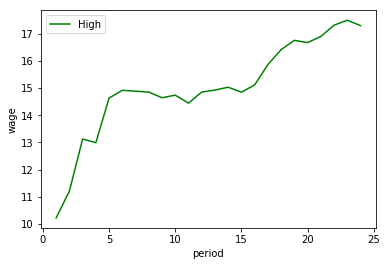

In [21]:
# Average period wage by level of education
fig,ax = plt.subplots()

# Generate x axis values
period = np.arange(1,25)

#Generate lines
ax.plot(period,
        data[data['Educ Level'] == 2].groupby(['Period'])['Wage Observed'].mean(),
        color='green', label = 'High')

# Plot settings
ax.set_xlabel("period")
ax.set_ylabel("wage")
ax.legend(loc='best')

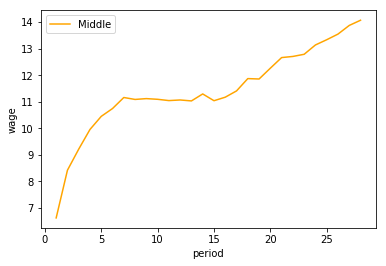

In [22]:
# Average period wage by level of education
fig,ax = plt.subplots()

# Generate x axis values
period = np.arange(1,29)

ax.plot(period,
        data[data['Educ Level'] == 1].groupby(['Period'])['Wage Observed'].mean(),
        color='orange', label = 'Middle')

# Plot settings
ax.set_xlabel("period")
ax.set_ylabel("wage")
ax.legend(loc='best')

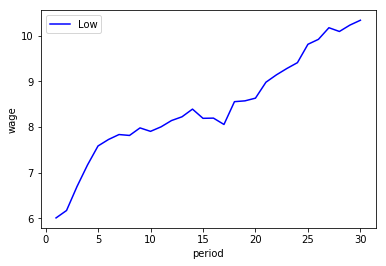

In [23]:
# Average period wage by level of education
fig,ax = plt.subplots()

# Generate x axis values
period = np.arange(1,31)

ax.plot(period,
        data[data['Educ Level'] == 0].groupby(['Period'])['Wage Observed'].mean(), 
        color='blue', label = 'Low')

# Plot settings
ax.set_xlabel("period")
ax.set_ylabel("wage")
ax.legend(loc='best')

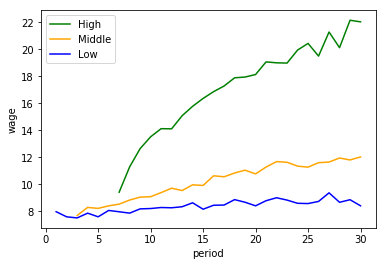

In [24]:
# Simulated sample
fig,ax = plt.subplots()

# Generate x axis values
period = np.arange(1,31)

#Generate lines
ax.plot(period,
        data_sim[data_sim['Educ Level'] == 2].groupby(['Period'])['Wage Observed'].mean(),
        color='green', label = 'High')
ax.plot(period,
        data_sim[data_sim['Educ Level'] == 1].groupby(['Period'])['Wage Observed'].mean(),
        color='orange', label = 'Middle')
ax.plot(period,
        data_sim[data_sim['Educ Level'] == 0].groupby(['Period'])['Wage Observed'].mean(), 
        color='blue', label = 'Low')

# Plot settings
ax.set_xlabel("period")
ax.set_ylabel("wage")
ax.legend(loc='best')

To show:
----------

In [25]:
pt_id = list(data[(data['Period'] == 29) & (data['Choice'] == 1)]['pid'])
ft_id = list(data[(data['Period'] == 29) & (data['Choice'] == 2)]['pid'])

In [26]:
data_pt = pd.DataFrame()
for i in range(len(pt_id)):
    person_data = data[data['pid'] == pt_id[i]]
    data_pt = data_pt.append(person_data)

In [27]:
data_ft = pd.DataFrame()
for i in range(len(ft_id)):
    person_data = data[data['pid'] == ft_id[i]]
    data_ft = data_ft.append(person_data)

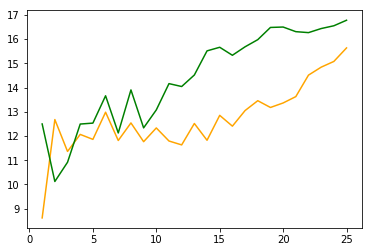

In [28]:
# Wage growth of part-time versus full-time workers as observed in last period
# SOEP data
fig,ax = plt.subplots()

# Generate x axis values
period = np.arange(1,26)

#Generate lines
ax.plot(period,
        data_pt.groupby(['Period'])['Wage Observed'].mean(),
        color='orange', label = 'PT')
ax.plot(period,
        data_ft.groupby(['Period'])['Wage Observed'].mean(),
        color='green', label = 'FT')

In [29]:
# Average years of experience in part-time and full-time among 'part-timers'
(data_pt[data_pt['Period'] == 29]['exper_pt'].describe()['mean'],
 #data_pt[data_pt['Period'] == 29]['exper_pt'].describe()['std'],
 data_pt[data_pt['Period'] == 29]['exper_ft'].describe()['mean'],
 #data_pt[data_pt['Period'] == 29]['exper_ft'].describe()['std']
)

(9.412765957446808, 8.872340425531915)

In [30]:
# Average years of experience in part-time and full-time among 'full-timers'
(data_ft[data_ft['Period'] == 29]['exper_pt'].describe()['mean'],
 #data_ft[data_ft['Period'] == 29]['exper_pt'].describe()['std'],
 data_ft[data_ft['Period'] == 29]['exper_ft'].describe()['mean'],
 #data_ft[data_ft['Period'] == 29]['exper_ft'].describe()['std']
)

(3.111576011157601, 17.880055788005578)

In [31]:
# Education level propensities among 'part-timers'
data_pt[data_pt['Period'] == 29].groupby('Educ Level')['pid'].count()/data_pt[data_pt['Period'] == 29]['pid'].count()

Educ Level
0    0.317766
1    0.537056
2    0.145178
Name: pid, dtype: float64

In [32]:
# Education level propensities among 'full-timers'
data_ft[data_ft['Period'] == 29].groupby('Educ Level')['pid'].count()/data_ft[data_ft['Period'] == 29]['pid'].count()

Educ Level
0    0.371202
1    0.459709
2    0.169089
Name: pid, dtype: float64

In [33]:
# Difference in average wages of part-timers and full-timers in last period
data_ft[data_ft['Period'] == 21]['Wage Observed'].mean() - data_pt[data_pt['Period'] == 21]['Wage Observed'].mean()

2.6314532381429654

Simulated sample

In [34]:
pt_id = list(data_sim[(data_sim['Period'] == 29) & (data_sim['Choice'] == 1)]['Identifier'])
ft_id = list(data_sim[(data_sim['Period'] == 29) & (data_sim['Choice'] == 2)]['Identifier'])

In [35]:
data_sim_pt = pd.DataFrame()
for i in range(len(pt_id)):
    person_data = data_sim[data_sim['Identifier'] == pt_id[i]]
    data_sim_pt = data_sim_pt.append(person_data)

In [36]:
data_sim_ft = pd.DataFrame()
for i in range(len(ft_id)):
    person_data = data_sim[data_sim['Identifier'] == ft_id[i]]
    data_sim_ft = data_sim_ft.append(person_data)

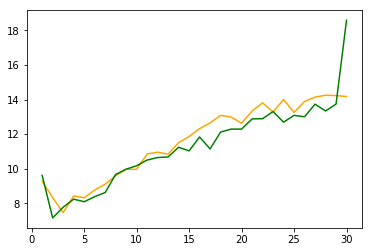

In [37]:
# Wage growth of part-time versus full-time workers as observed in last period
# SOEP data
fig,ax = plt.subplots()

# Generate x axis values
period = np.arange(1,31)

#Generate lines
ax.plot(period,
        data_sim_pt.groupby(['Period'])['Wage Observed'].mean(),
        color='orange', label = 'PT')
ax.plot(period,
        data_sim_ft.groupby(['Period'])['Wage Observed'].mean(),
        color='green', label = 'FT')

In [38]:
# Average years of experience in part-time and full-time among 'part-timers'
(data_sim_pt[data_sim_pt['Choice'] == 1].groupby(['Identifier'])['Period'].count().mean(),
 data_sim_pt[data_sim_pt['Choice'] == 2].groupby(['Identifier'])['Period'].count().mean())

(9.73972602739726, 8.924657534246576)

In [39]:
# Average years of experience in part-time and full-time among 'full-timers'
(data_sim_ft[data_sim_ft['Choice'] == 1].groupby(['Identifier'])['Period'].count().mean(),
 data_sim_ft[data_sim_ft['Choice'] == 2].groupby(['Identifier'])['Period'].count().mean())

(7.841614906832298, 9.72782874617737)

In [40]:
# Education level propensities among 'part-timers'
data_sim_pt[data_sim_pt['Period'] == 29].groupby('Educ Level')['Identifier'].count()/data_sim_pt[data_sim_pt['Period'] == 29]['Identifier'].count()

Educ Level
0    0.099315
1    0.630137
2    0.270548
Name: Identifier, dtype: float64

In [41]:
# Education level propensities among 'full-timers'
data_sim_ft[data_sim_ft['Period'] == 29].groupby('Educ Level')['Identifier'].count()/data_sim_ft[data_sim_ft['Period'] == 29]['Identifier'].count()

Educ Level
0    0.162080
1    0.620795
2    0.217125
Name: Identifier, dtype: float64

Beliefs counterfactual

In [1]:
import soepy

# Simulate dataset based on estimated parameter vector
data_sim_2 = soepy.simulate('results_4_init_file_1000.yml')

In [4]:
#Determine the observed wage given period choice
def get_observed_wage (row):
    if row['Choice'] == 2:
        return row['Period Wage F']
    elif row['Choice'] ==1:
        return row['Period Wage P']
    elif row['Choice'] ==0:
        return row['Period Wage N']
    else:
        return np.nan

# Add to data frame
data_sim_2['Wage Observed'] = data_sim_2.apply(
    lambda row: get_observed_wage (row),axis=1
)

# Determine the education level
def get_educ_level(row):
    if row["Years of Education"] >= 10 and row["Years of Education"] < 12:
        return 0
    elif row["Years of Education"] >= 12 and row["Years of Education"] < 16:
        return 1
    elif row["Years of Education"] >= 16:
        return 2
    else:
        return np.nan

data_sim_2["Educ Level"] = data_sim_2.apply(
    lambda row: get_educ_level(row), axis=1
)

In [3]:
import soepy

In [4]:
# Counterfactual simulation biased beliefs
data_sim_counterfactual = soepy.simulate('results_2_init_file_1000.yml')

In [5]:
data_sim_counterfactual.to_pickle("data_sim_counterfactual.soepy.pkl")

In [6]:
data_sim_counterfactual = pd.read_pickle("data_sim_counterfactual.soepy.pkl")

In [7]:
data_sim_counterfactual.head()

,Identifier,Period,Years of Education,Choice,Systematic Wage,Period Wage N,Period Wage P,Period Wage F,Consumption Utility N,Consumption Utility P,Consumption Utility F,Flow Utility N,Flow Utility P,Flow Utility F
0,0,0,10,2.0,6.855149,6.0,8.188784,15.014135,-0.654707,-0.109008,-0.051085,-0.654707,-0.728813,-0.586686
1,0,1,10,0.0,7.423946,6.0,8.725563,5.065398,-0.654707,-0.105200,-0.093875,-0.654707,-0.703355,-1.078108
2,0,2,10,0.0,7.423946,6.0,5.689242,8.746799,-0.654707,-0.133668,-0.069135,-0.654707,-0.893693,-0.793982
3,0,3,10,0.0,7.423946,6.0,8.349554,4.796164,-0.654707,-0.107827,-0.096790,-0.654707,-0.720921,-1.111592
4,0,4,10,0.0,7.423946,6.0,7.107834,4.972434,-0.654707,-0.118001,-0.094854,-0.654707,-0.788944,-1.089350


In [8]:
#Determine the observed wage given period choice
def get_observed_wage (row):
    if row['Choice'] == 2:
        return row['Period Wage F']
    elif row['Choice'] ==1:
        return row['Period Wage P']
    elif row['Choice'] ==0:
        return row['Period Wage N']
    else:
        return np.nan

# Add to data frame
data_sim_counterfactual['Wage Observed'] = data_sim_counterfactual.apply(
    lambda row: get_observed_wage (row),axis=1
)

# Determine the education level
def get_educ_level(row):
    if row["Years of Education"] >= 10 and row["Years of Education"] < 12:
        return 0
    elif row["Years of Education"] >= 12 and row["Years of Education"] < 16:
        return 1
    elif row["Years of Education"] >= 16:
        return 2
    else:
        return np.nan

data_sim_counterfactual["Educ Level"] = data_sim_counterfactual.apply(
    lambda row: get_educ_level(row), axis=1
)

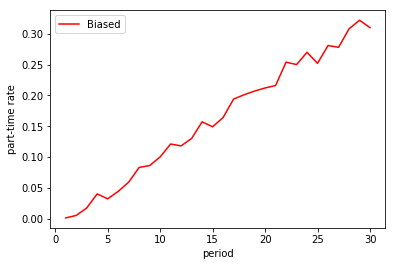

In [9]:
# Part-time rates by peroid with rational expectations
fig,ax = plt.subplots()

# Generate x axis values
period = np.arange(1,31)

#Generate lines
# ax.plot(period,
#         data_sim_2[data_sim_2['Choice'] == 1].groupby(['Period'])['Identifier'].count()/1000,
#         color='red', label = 'Biased')
ax.plot(period,
        data_sim_counterfactual[data_sim_counterfactual['Choice'] == 1].groupby(['Period'])['Identifier'].count()/1000,
        color='red', label = 'Biased')

# Plot settings
ax.set_xlabel("period")
ax.set_ylabel("part-time rate")
ax.legend(loc='best')

In [16]:
# Counterfactual simulation biased beliefs
# data_sim_rational = soepy.simulate('results_2_init_file_1000.yml')

In [19]:
data_sim_rational.to_pickle("data_sim_rational.soepy.pkl")

In [10]:
data_sim_rational = pd.read_pickle("data_sim_rational.soepy.pkl")

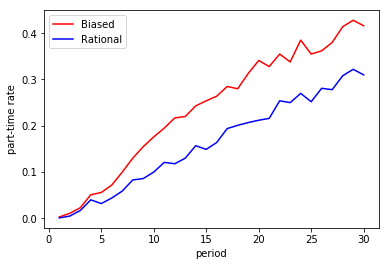

In [16]:
# Part-time rates by peroid with rational expectations
fig,ax = plt.subplots()

# Generate x axis values
period = np.arange(1,31)

#Generate lines
ax.plot(period,
        data_sim_rational[data_sim_rational['Choice'] == 1].groupby(['Period'])['Identifier'].count()/1000,
        color='red', label = 'Biased')
ax.plot(period,
        data_sim_counterfactual[data_sim_counterfactual['Choice'] == 1].groupby(['Period'])['Identifier'].count()/1000,
        color='blue', label = 'Rational')

# Plot settings
ax.set_xlabel("period")
ax.set_ylabel("part-time rate")
ax.legend(loc='best')

In [14]:
data_sim_counterfactual.head(30)

,Identifier,Period,Years of Education,Choice,Systematic Wage,Period Wage N,Period Wage P,Period Wage F,Consumption Utility N,Consumption Utility P,Consumption Utility F,Flow Utility N,Flow Utility P,Flow Utility F,Wage Observed,Educ Level
0,0,0,10,2.0,6.855149,6.0,8.188784,15.014135,-0.654707,-0.109008,-0.051085,-0.654707,-0.728813,-0.586686,15.014135,0
1,0,1,10,0.0,7.423946,6.0,8.725563,5.065398,-0.654707,-0.105200,-0.093875,-0.654707,-0.703355,-1.078108,6.000000,0
2,0,2,10,0.0,7.423946,6.0,5.689242,8.746799,-0.654707,-0.133668,-0.069135,-0.654707,-0.893693,-0.793982,6.000000,0
3,0,3,10,0.0,7.423946,6.0,8.349554,4.796164,-0.654707,-0.107827,-0.096790,-0.654707,-0.720921,-1.111592,6.000000,0
4,0,4,10,0.0,7.423946,6.0,7.107834,4.972434,-0.654707,-0.118001,-0.094854,-0.654707,-0.788944,-1.089350,6.000000,0
5,0,5,10,2.0,7.423946,6.0,8.181864,16.784272,-0.654707,-0.109059,-0.047994,-0.654707,-0.729158,-0.551189,16.784272,0
6,0,6,10,1.0,7.787468,6.0,11.461648,11.878650,-0.654707,-0.090299,-0.058246,-0.654707,-0.603727,-0.668923,11.461648,0
7,0,7,10,0.0,7.841832,6.0,7.258882,8.760159,-0.654707,-0.116620,-0.069076,-0.654707,-0.779708,-0.793303,6.000000,0
8,0,8,10,0.0,7.841832,6.0,7.081287,5.600789,-0.654707,-0.118249,-0.088739,-0.654707,-0.790599,-1.019123,6.000000,0
9,0,9,10,0.0,7.841832,6.0,7.440079,5.851004,-0.654707,-0.115021,-0.086593,-0.654707,-0.769016,-0.994482,6.000000,0


In [15]:
data_sim_rational.head(30)

,Identifier,Period,Years of Education,Choice,Systematic Wage,Period Wage N,Period Wage P,Period Wage F,Consumption Utility N,Consumption Utility P,Consumption Utility F,Flow Utility N,Flow Utility P,Flow Utility F
0,0,0,10,2.0,6.855149,6.0,8.188784,15.014135,-0.654707,-0.109008,-0.051085,-0.654707,-0.728813,-0.586686
1,0,1,10,0.0,7.423946,6.0,8.725563,5.065398,-0.654707,-0.105200,-0.093875,-0.654707,-0.703355,-1.078108
2,0,2,10,0.0,7.423946,6.0,5.689242,8.746799,-0.654707,-0.133668,-0.069135,-0.654707,-0.893693,-0.793982
3,0,3,10,0.0,7.423946,6.0,8.349554,4.796164,-0.654707,-0.107827,-0.096790,-0.654707,-0.720921,-1.111592
4,0,4,10,0.0,7.423946,6.0,7.107834,4.972434,-0.654707,-0.118001,-0.094854,-0.654707,-0.788944,-1.089350
5,0,5,10,2.0,7.423946,6.0,8.181864,16.784272,-0.654707,-0.109059,-0.047994,-0.654707,-0.729158,-0.551189
6,0,6,10,1.0,7.787468,6.0,11.461648,11.878650,-0.654707,-0.090299,-0.058246,-0.654707,-0.603727,-0.668923
7,0,7,10,0.0,7.841832,6.0,7.258882,8.760159,-0.654707,-0.116620,-0.069076,-0.654707,-0.779708,-0.793303
8,0,8,10,0.0,7.841832,6.0,7.081287,5.600789,-0.654707,-0.118249,-0.088739,-0.654707,-0.790599,-1.019123
9,0,9,10,0.0,7.841832,6.0,7.440079,5.851004,-0.654707,-0.115021,-0.086593,-0.654707,-0.769016,-0.994482
